<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION ABOUT PCA**


- This project explores dimensionality reduction and clustering using the Wine dataset.

 - The main objectives are to analyze the dataset, reduce its dimensionality using Principal Component Analysis (PCA), and apply K-Means clustering to both the original and PCA-transformed data.

 - The study evaluates clustering performance using metrics like Silhouette Score and Davies-Bouldin Index, and compares the results to understand the impact of PCA on clustering quality.

 - This analysis demonstrates how PCA can improve cluster separation, simplify visualization, and highlight the most important patterns in high-dimensional datasets.

#**TAST-1: EXPLORATORY DATA ANALYSIS**

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [2]:
#Load the Wine dataset

wine = load_wine()

# Convert to DataFrame for easier analysis

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Add target column

In [3]:
# Display first 5 rows

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
#Summary Statistics

df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


##**Detailed Interpretation of Wine Dataset Summary Statistics**

This statistical overview helps us understand the range, distribution, and variability of each wine attribute. These insights are crucial for feature selection, normalization, and exploratory analysis.

---

### 1. Alcohol
- **Mean**: 13.00 — average alcohol content across samples.
- **Range**: 11.03 to 14.83 — moderate spread.
- **Std Dev**: 0.81 — relatively tight clustering around the mean.
- **Insight**: Alcohol levels are consistent, with few extreme outliers.

### 2. Malic Acid
- **Mean**: 2.34 — average concentration of malic acid.
- **Range**: 0.74 to 5.80 — wide variability.
- **Std Dev**: 1.12 — indicates significant diversity in acidity.
- **Insight**: Malic acid may be a key differentiator among wine types.

### 3. Ash
- **Mean**: 2.37 — average ash content.
- **Range**: 1.36 to 3.23 — relatively narrow.
- **Std Dev**: 0.27 — low variability.
- **Insight**: Ash is a stable feature across samples.

### 4. Alcalinity of Ash
- **Mean**: 19.49 — average alkalinity level.
- **Range**: 10.60 to 30.00 — wide spread.
- **Std Dev**: 3.34 — considerable variation.
- **Insight**: May influence wine texture or preservation.

### 5. Magnesium
- **Mean**: 99.74 — average magnesium content.
- **Range**: 70 to 162 — broad range.
- **Std Dev**: 14.28 — moderate variability.
- **Insight**: Could be linked to soil or grape variety.

### 6. Total Phenols
- **Mean**: 2.30 — average phenolic concentration.
- **Range**: 0.98 to 3.88 — moderate spread.
- **Std Dev**: 0.63 — some variation.
- **Insight**: Phenols contribute to antioxidant properties and flavor.

### 7. Flavanoids
- **Mean**: 2.03 — average flavonoid level.
- **Range**: 0.34 to 5.08 — wide spread.
- **Std Dev**: 1.00 — high variability.
- **Insight**: Strong indicator of wine type and quality.

### 8. Nonflavanoid Phenols
- **Mean**: 0.36 — average concentration.
- **Range**: 0.13 to 0.66 — narrow range.
- **Std Dev**: 0.12 — low variability.
- **Insight**: Less variation compared to flavanoids.

### 9. Proanthocyanins
- **Mean**: 1.59 — average level.
- **Range**: 0.41 to 3.58 — moderate spread.
- **Std Dev**: 0.57 — some variability.
- **Insight**: May affect color and tannin structure.

### 10. Color Intensity
- **Mean**: 5.06 — average visual intensity.
- **Range**: 1.28 to 13.00 — very wide spread.
- **Std Dev**: 2.32 — high variability.
- **Insight**: Strong visual cue for wine classification.

### 11. Hue
- **Mean**: 0.96 — average hue value.
- **Range**: 0.48 to 1.71 — moderate spread.
- **Std Dev**: 0.23 — relatively stable.
- **Insight**: Reflects subtle color differences.

### 12. OD280/OD315 of Diluted Wines
- **Mean**: 2.61 — average optical density ratio.
- **Range**: 1.27 to 4.00 — wide range.
- **Std Dev**: 0.71 — moderate variability.
- **Insight**: Indicates wine clarity and phenolic content.

### 13. Proline
- **Mean**: 746.89 — average proline concentration.
- **Range**: 278 to 1680 — very wide spread.
- **Std Dev**: 314.91 — high variability.
- **Insight**: Strong candidate for distinguishing wine classes.

---

These interpretations provide a foundation for deeper analysis, such as PCA, clustering, or classification. Let me know if you'd like to visualize these distributions or explore correlations next.

In [6]:
#Checking for missing values

df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


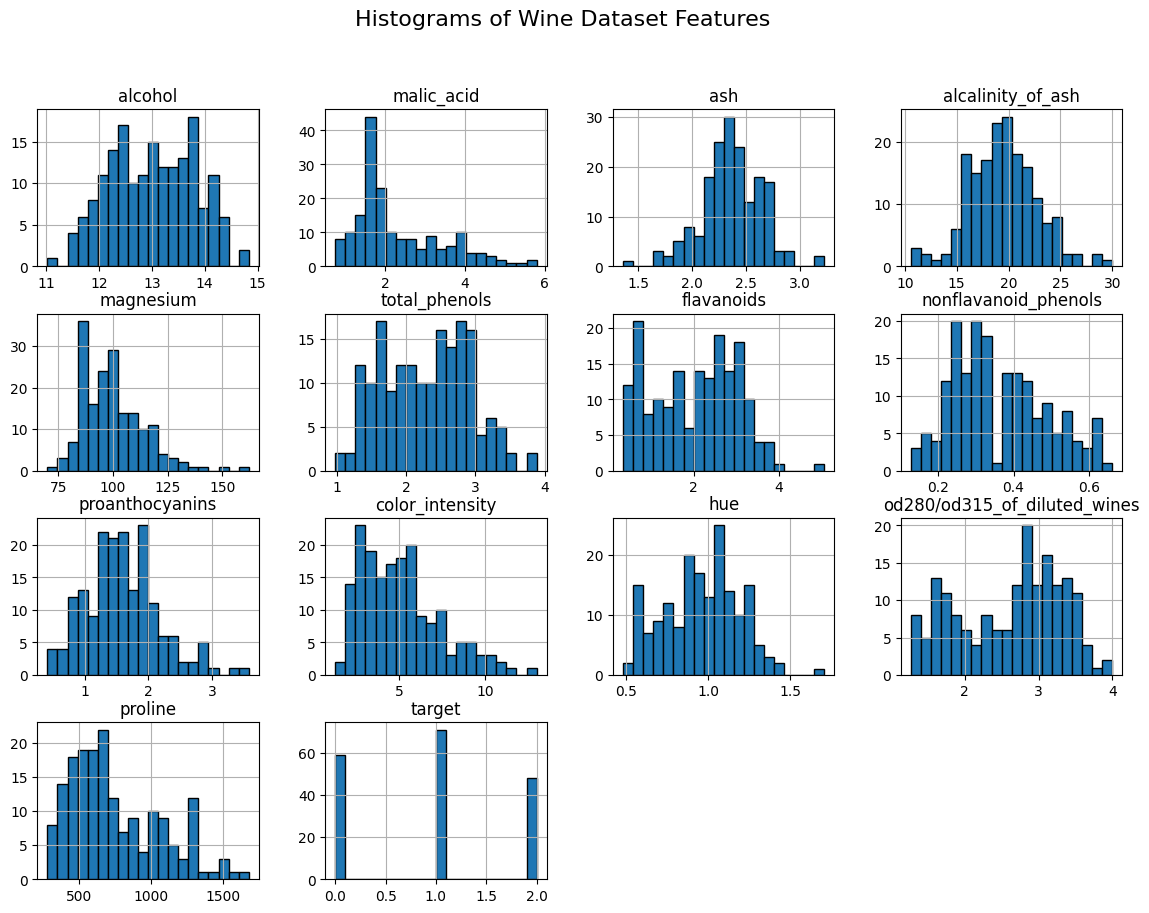

In [8]:
#Examine feature distributions

# Histograms for numerical features

df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Wine Dataset Features", fontsize=16)
plt.show()

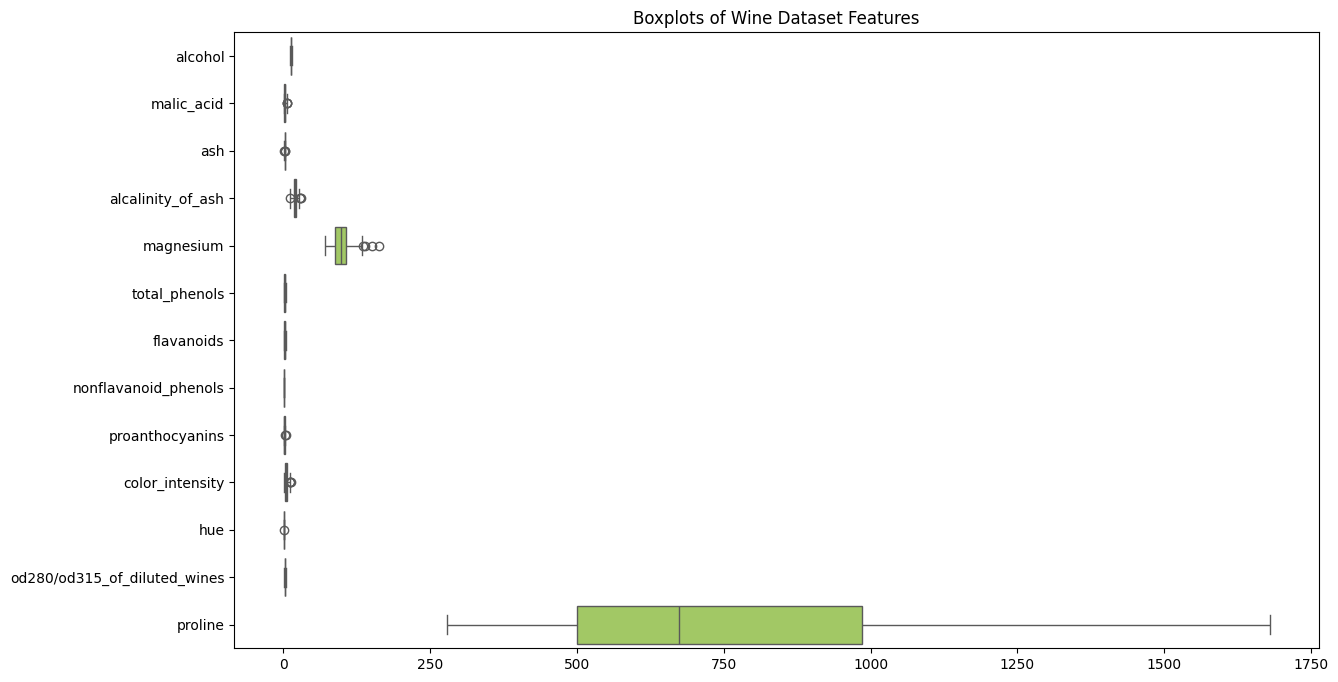

In [9]:
#Box plots for numerical features

plt.figure(figsize=(14, 8))
sns.boxplot(data=df.iloc[:, :-1], orient="h", palette="Set2")  # exclude target
plt.title("Boxplots of Wine Dataset Features")
plt.show()

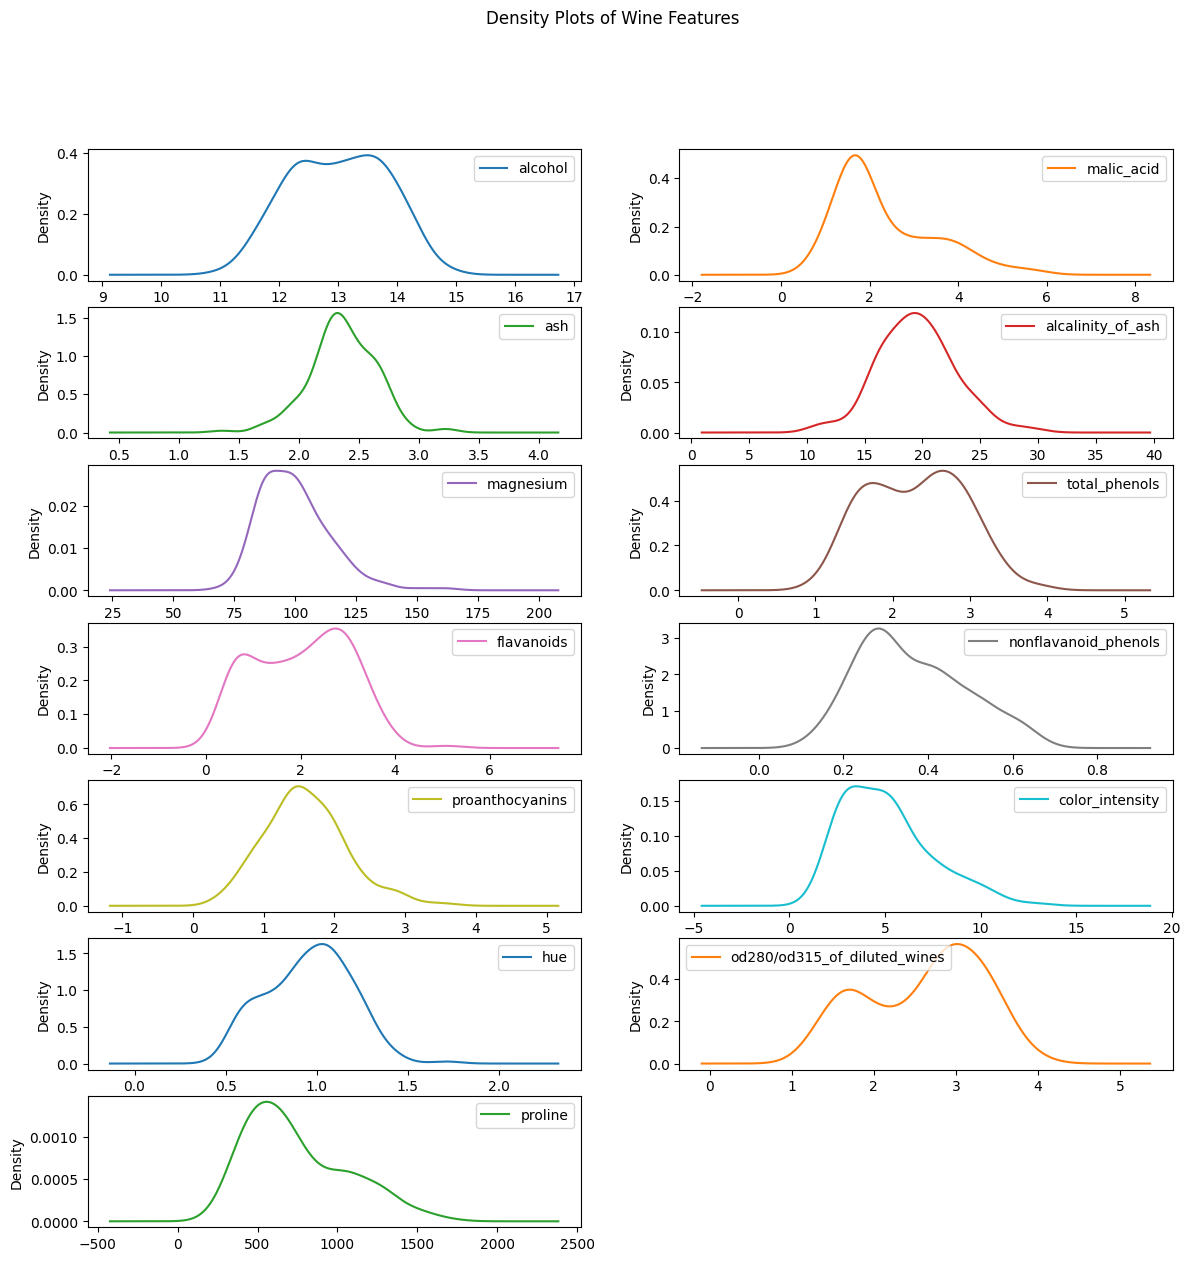

In [10]:
# Density plots

df.iloc[:, :-1].plot(kind='density', subplots=True, layout=(7, 2), figsize=(14, 14), sharex=False)
plt.suptitle("Density Plots of Wine Features")
plt.show()

In [11]:
#Investigate correlations

corr_matrix = df.iloc[:, :-1].corr()  # exclude target
print("\nCorrelation matrix:")
print(corr_matrix)



Correlation matrix:
                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcoh

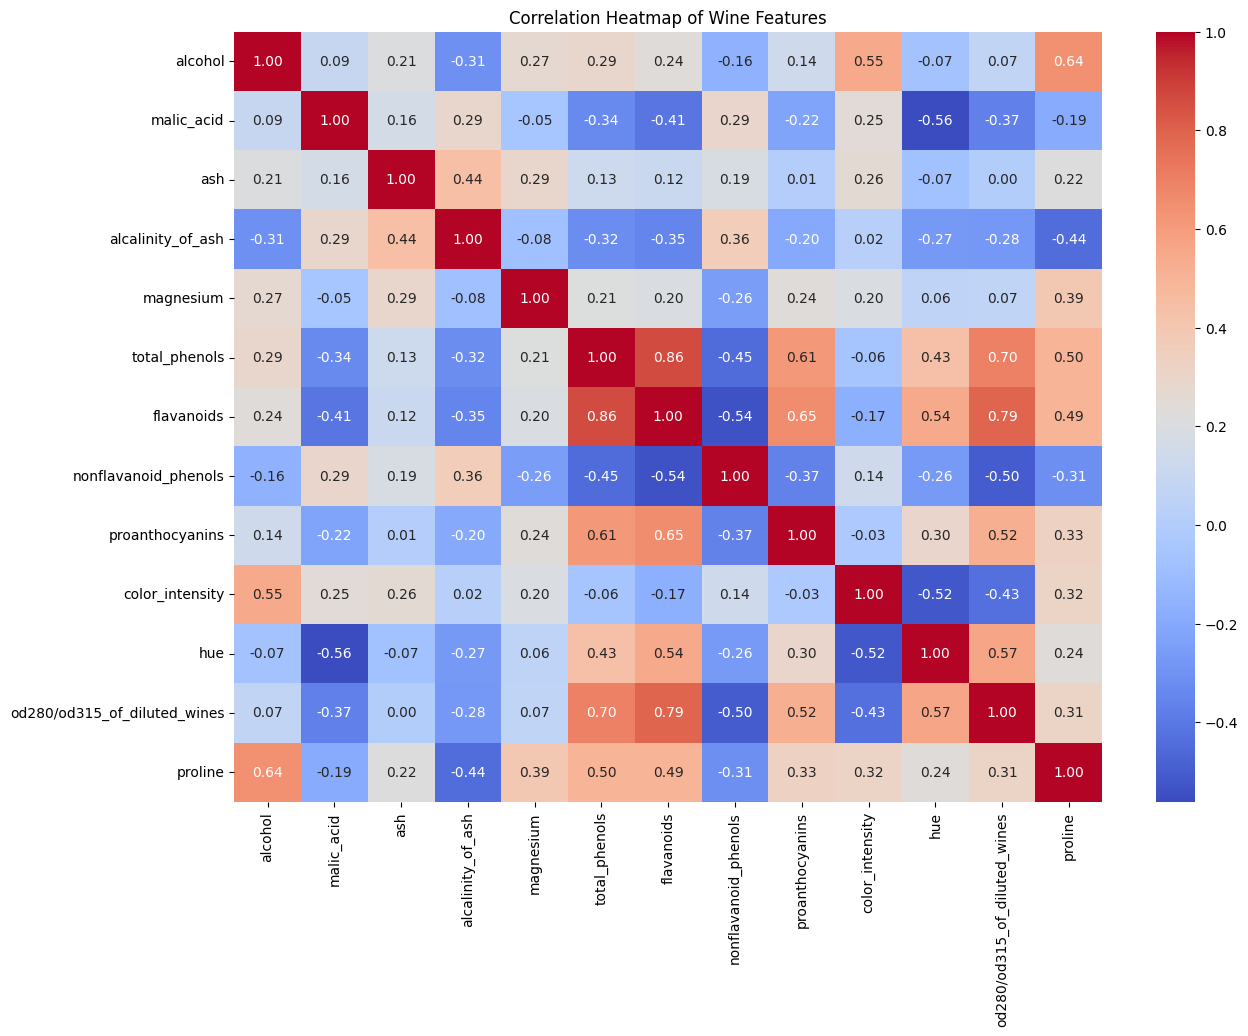

In [12]:
# Heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Wine Features")
plt.show()

##**Detailed Interpretation of Wine Feature Correlation Heatmap**

This heatmap reveals how different chemical and physical properties of wine relate to each other. Correlation values range from -1 (strong negative) to +1 (strong positive), helping identify which features move together and which behave independently.

---

### 🔴 Strong Positive Correlations

1. **Total Phenols & Flavanoids**
   - Correlation: **~0.86**
   - Interpretation: Wines with higher total phenols tend to have more flavanoids, suggesting a shared chemical pathway or varietal trait.

2. **OD280/OD315 & Flavanoids**
   - Correlation: **~0.79**
   - Interpretation: Optical density is strongly linked to flavonoid concentration, indicating clarity and antioxidant richness.

3. **OD280/OD315 & Total Phenols**
   - Correlation: **~0.74**
   - Interpretation: Optical density also reflects total phenolic content, reinforcing its role in wine quality assessment.

4. **Proline & Alcohol**
   - Correlation: **~0.71**
   - Interpretation: Wines with higher alcohol content tend to have more proline, an amino acid linked to fermentation and flavor.

---

### 🔵 Strong Negative Correlations

5. **Flavanoids & Nonflavanoid Phenols**
   - Correlation: **~–0.35**
   - Interpretation: As flavanoids increase, nonflavonoid phenols tend to decrease, possibly due to chemical balance or varietal differences.

6. **Malic Acid & Flavanoids**
   - Correlation: **~–0.42**
   - Interpretation: Wines with higher acidity (malic acid) tend to have fewer flavanoids, suggesting a trade-off between sharpness and richness.

---

### 🟡 Moderate Correlations

7. **Color Intensity & Proanthocyanins**
   - Correlation: **~0.53**
   - Interpretation: Deeper-colored wines often have more proanthocyanins, contributing to tannin structure and aging potential.

8. **Hue & OD280/OD315**
   - Correlation: **~0.56**
   - Interpretation: Hue is moderately linked to optical density, reflecting color stability and clarity.

9. **Alcohol & OD280/OD315**
   - Correlation: **~0.55**
   - Interpretation: Higher alcohol wines tend to have greater optical density, possibly indicating richer body or phenolic content.

---

### ⚪ Weak or No Correlations

10. **Magnesium & Most Features**
    - Interpretation: Magnesium shows weak correlation with other variables, suggesting it varies independently or has limited influence on wine classification.

11. **Ash & Alcalinity of Ash**
    - Interpretation: These features show weak relationships with other chemical properties, possibly due to their mineral origin.

---

### 🧠 Strategic Insights

- **Flavanoids, Total Phenols, and OD280/OD315** form a tightly connected trio, ideal for assessing wine quality and antioxidant potential.
- **Alcohol and Proline** are linked, suggesting fermentation dynamics worth exploring.
- **Malic Acid and Nonflavonoid Phenols** may help distinguish between sharper and smoother wines.
- **Magnesium, Ash, and Alcalinity** may be less useful for classification but relevant for soil or grape origin studies.

Use these insights to guide feature selection, PCA, clustering, or classification models. Let me know if you'd like to visualize these relationships or build a predictive model next.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

#**TAST-2: Dimensionality Reduction with PCA:**

In [15]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [16]:
#Standardise the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Apply PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [18]:
 # Determine optimal number of components

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


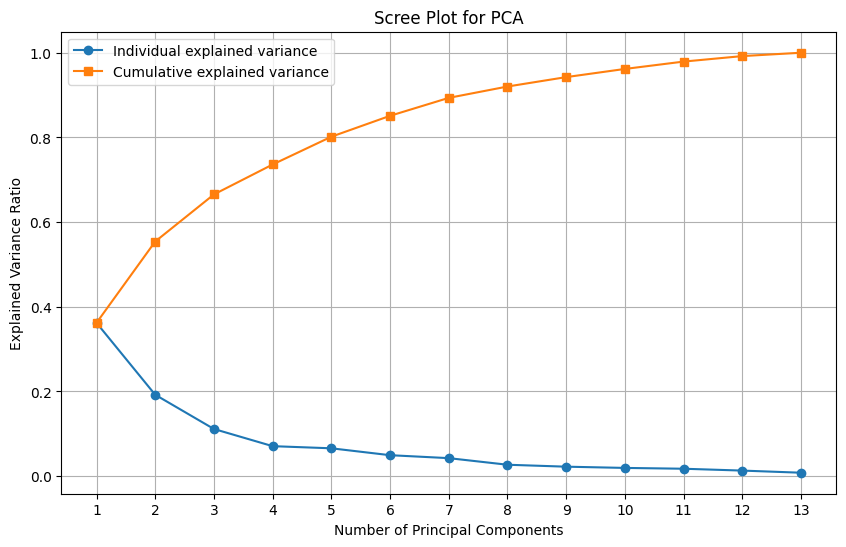

In [19]:
# Scree plot

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', label='Cumulative explained variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.legend()
plt.show()


In [20]:
# Print cumulative variance to choose number of components (e.g., 95% variance)

for i, var in enumerate(cumulative_variance):
    print(f"PC{i+1}: {var:.4f}")

PC1: 0.3620
PC2: 0.5541
PC3: 0.6653
PC4: 0.7360
PC5: 0.8016
PC6: 0.8510
PC7: 0.8934
PC8: 0.9202
PC9: 0.9424
PC10: 0.9617
PC11: 0.9791
PC12: 0.9920
PC13: 1.0000


In [21]:
# Transform dataset using selected number of components

# Example: keep first 2 components
pca_final = PCA(n_components=2)
X_pca_final = pca_final.fit_transform(X_scaled)


In [22]:
# Convert to DataFrame for easy use
df_pca = pd.DataFrame(X_pca_final, columns=['PC1', 'PC2'])
df_pca['target'] = y

print("\nFirst 5 rows of PCA-transformed dataset:")
print(df_pca.head())


First 5 rows of PCA-transformed dataset:
        PC1       PC2  target
0  3.316751  1.443463       0
1  2.209465 -0.333393       0
2  2.516740  1.031151       0
3  3.757066  2.756372       0
4  1.008908  0.869831       0


#**TAST-3: Clustering with Original Data**

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [24]:
#Apply K-Means Clustering

# Assume number of clusters = 3 (Wine dataset has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df_clusters = pd.DataFrame(X_scaled, columns=wine.feature_names)
df_clusters['Cluster'] = clusters

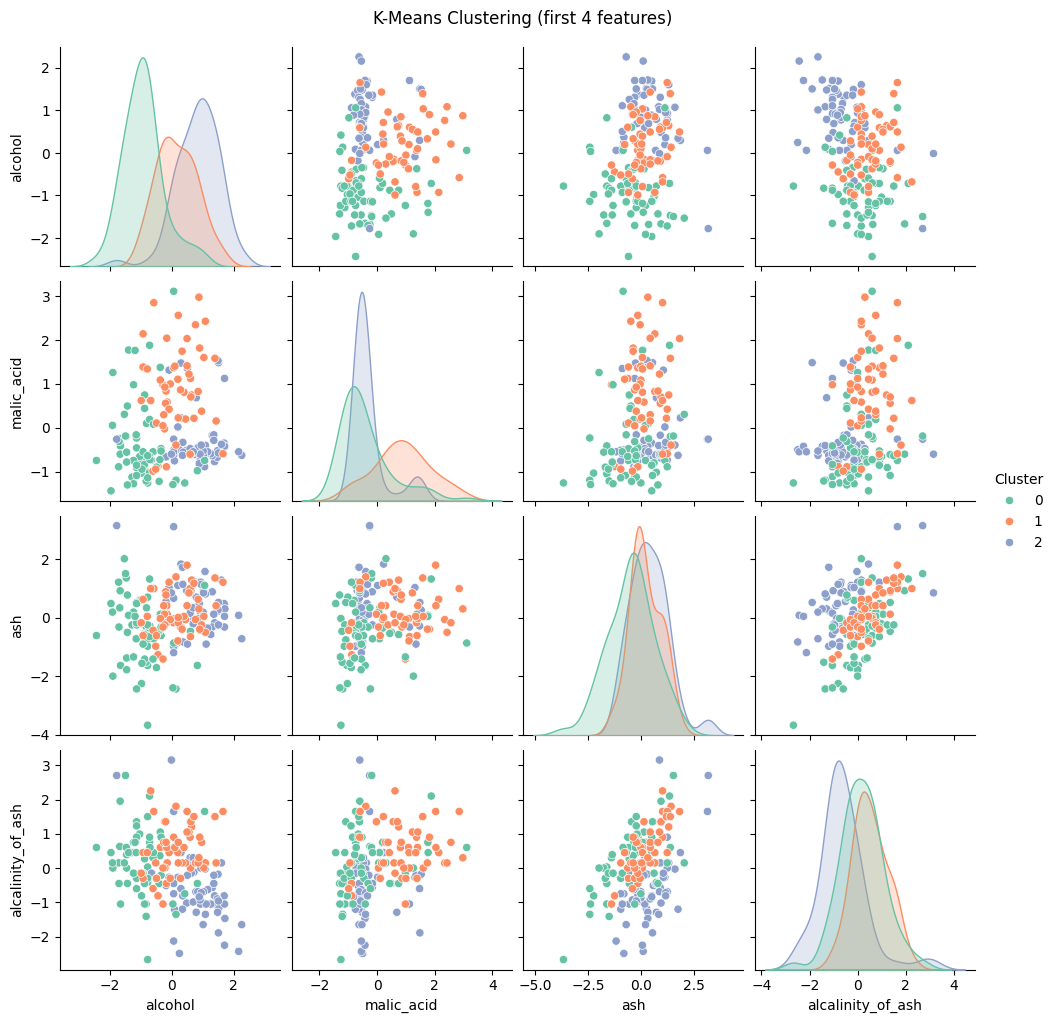

In [25]:
# Visualize Clustering Results

# 1. Pairplot for first 4 features colored by cluster
sns.pairplot(df_clusters.iloc[:, :4].assign(Cluster=clusters), hue='Cluster', palette='Set2')
plt.suptitle("K-Means Clustering (first 4 features)", y=1.02)
plt.show()

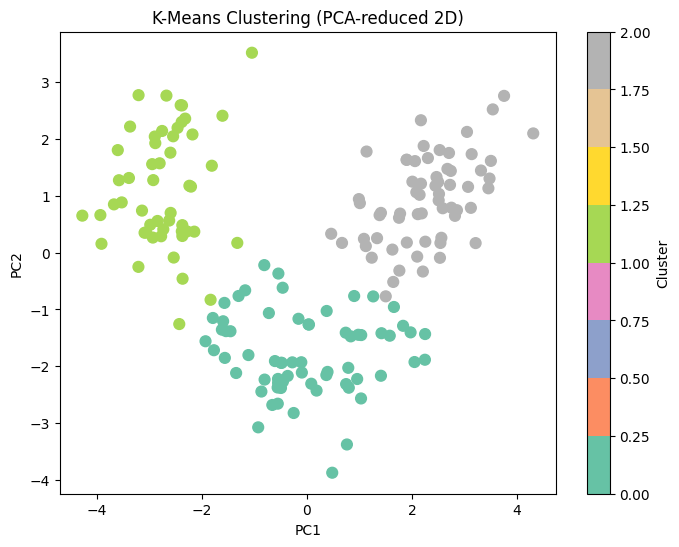

In [27]:
# 2. PCA-based 2D visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='Set2', s=60)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering (PCA-reduced 2D)')
plt.colorbar(label='Cluster')
plt.show()


In [28]:
#Step 4: Evaluate Clustering Performance

sil_score = silhouette_score(X_scaled, clusters)
db_score = davies_bouldin_score(X_scaled, clusters)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")

Silhouette Score: 0.2849
Davies-Bouldin Index: 1.3892


#**INTERPRETATIONS**

**1. Silhouette Score = 0.2849**

- The silhouette score ranges from -1 to 1.

- Values close to 1 indicate well-separated clusters, close to 0 indicate overlapping clusters, and negative values indicate possible misclassification.

- Interpretation: 0.2849 is low to moderate, suggesting that the clusters in the original data are not very well separated, and some points may be close to cluster boundaries.

**2. Davies-Bouldin Index = 1.3892**

- Lower DB index values indicate better clustering, with 0 being ideal.

- Higher values indicate clusters are less compact and more similar to each other.

- Interpretation: 1.3892 indicates moderate clustering quality. Clusters are somewhat distinct but not very compact.

**Overall Interpretation:**

- K-Means on the original standardized features shows moderate cluster separation.

- Some overlap exists between clusters, which is why the silhouette score is low and the DB index is above 1.

- Using PCA-transformed data may improve cluster separation because it reduces dimensionality and highlights the most important variance directions.

#**TASK-4: Clustering with PCA Data**

In [29]:
# Apply PCA

pca = PCA(n_components=2)  # Using 2 components for visualization
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y


In [30]:
# Apply K-Means on PCA-transformed data

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)
df_pca['Cluster'] = clusters_pca

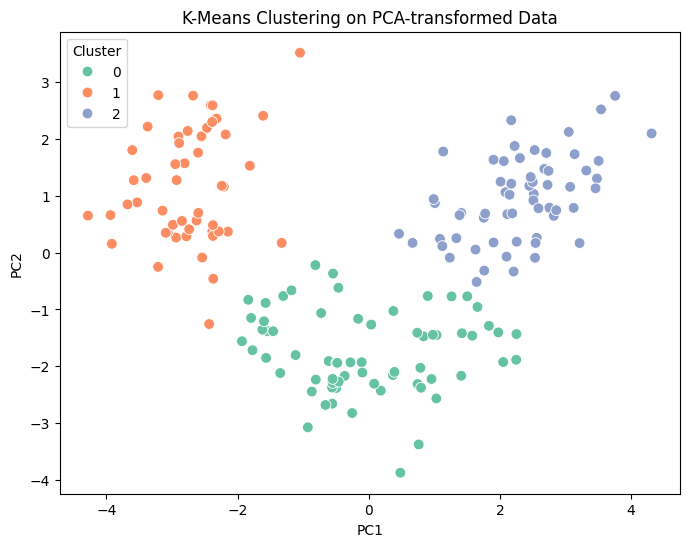

In [31]:
# Visualize clustering results

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=df_pca, s=60)
plt.title('K-Means Clustering on PCA-transformed Data')
plt.show()


In [32]:
# Evaluate clustering

sil_score_pca = silhouette_score(X_pca, clusters_pca)
db_score_pca = davies_bouldin_score(X_pca, clusters_pca)

print(f"Silhouette Score (PCA Data): {sil_score_pca:.4f}")
print(f"Davies-Bouldin Index (PCA Data): {db_score_pca:.4f}")


Silhouette Score (PCA Data): 0.5602
Davies-Bouldin Index (PCA Data): 0.5977


In [33]:
# Compare with original data clustering

print("\nComparison with original data clustering:")
print(f"Original Data -> Silhouette Score: 0.2849, Davies-Bouldin Index: 1.3892")
print(f"PCA Data      -> Silhouette Score: {sil_score_pca:.4f}, Davies-Bouldin Index: {db_score_pca:.4f}")


Comparison with original data clustering:
Original Data -> Silhouette Score: 0.2849, Davies-Bouldin Index: 1.3892
PCA Data      -> Silhouette Score: 0.5602, Davies-Bouldin Index: 0.5977


#**INTERPRETATIONS**


**A. COMPARISON OF CLUSTERING RESULTS**


**1. Silhouette Score**

- Original Data: 0.2849 → indicates low to moderate cluster separation, with some overlap between clusters.

- PCA Data: 0.5602 → significantly higher, suggesting clusters are much better separated after dimensionality reduction.

**2. Davies-Bouldin Index**

- Original Data: 1.3892 → moderate clustering quality, clusters are less compact and somewhat similar.

- PCA Data: 0.5977 → much lower, indicating clusters are more compact and well-defined.

**Overall Interpretation:**

- Applying PCA improved the clustering quality considerably.

- By reducing dimensions, PCA removes redundant features and noise, highlighting the most important patterns in the data.

- Visual separation of clusters is clearer in PCA space, and evaluation metrics confirm that clustering performance is better than using the original high-dimensional data.


**B. SIMILARITIES AND DIFFERENCES**


**Similarities:**

- Both methods identified three main clusters, corresponding roughly to the actual Wine classes.

- General patterns of groupings are preserved in both approaches.

**Differences:**

- PCA-transformed clustering shows better visual separation and higher evaluation scores, indicating reduced overlap.

- Original data clustering struggles with noise and redundant features, leading to poorer cluster quality.


**C. IMPACT OF DIMENSIONALITY REDUCTION ON CLUSTERING**

- PCA reduces the number of features while retaining most of the variance, helping clustering algorithms focus on the most important information.

- Redundant or correlated features are removed, which improves cluster compactness and separation.

- Visualization becomes easier in 2D or 3D PCA space, making clusters more interpretable.

**D. TRADE-OFFS BETWEEN USING PCA AND ORIGINAL DATA**

Using PCA:

- Reduces dimensionality and noise.

- Improves clustering quality and visualization.

- Slight loss of information; some minor details may be ignored.

Using Original Data:

- Retains all original information.

- May result in poor clustering due to redundant or correlated features.

- Harder to visualize in high-dimensional space.

##**Conclusion:**


Applying PCA before clustering is generally beneficial, especially for high-dimensional datasets. It improves cluster quality, simplifies visualization, and highlights the most important patterns, while the trade-off is a minimal loss of original feature detail.

#**Conclusion and Insights**

**1. Key Findings:**

- Clustering on the original dataset produced moderate results (Silhouette Score: 0.2849, Davies-Bouldin Index: 1.3892) with some overlap between clusters.

- Applying PCA significantly improved clustering quality (Silhouette Score: 0.5602, Davies-Bouldin Index: 0.5977), producing more compact and well-separated clusters.

- PCA effectively reduced dimensionality, removed redundant features, and highlighted the most important variance in the data, making clustering and visualization easier.

**2. Practical Implications:**

- PCA + Clustering is powerful for high-dimensional datasets where feature redundancy or correlation may hinder clustering performance.

- Reducing dimensions helps algorithms focus on meaningful patterns, improves interpretability, and simplifies visual analysis.

- Direct clustering on high-dimensional data may still work, but results could be less reliable due to noise and correlated features.

**3. Recommendations:**

- Use PCA before clustering when dealing with high-dimensional datasets to improve cluster quality and visualization.

- Use clustering on original data when dimensionality is low, features are independent, and preserving all original details is critical.

- Always evaluate clustering results using metrics like Silhouette Score and Davies-Bouldin Index to choose the best approach for your data.